In [10]:
import json
import os
import pandas as pd
import datetime
import numpy as np
import matplotlib
%matplotlib inline

In [3]:
DATASET_FOLDER = "./dataset"
train_processed_data = os.path.join(DATASET_FOLDER, 'train_sku_feature_data.parquet')
test_data = os.path.join(DATASET_FOLDER, 'test_data.csv')

In [4]:
df_train_v1 = pd.read_parquet(train_processed_data, engine='fastparquet')
df_train_v1 = df_train_v1.set_index('sku')

In [16]:
df_train_v1

,item_domain_id,item_id,item_title,site_id,product_id,product_family_id,count,date_first,date_last,date_diff,...,listing_type_mode_tx,shipping_logistic_type_first,shipping_logistic_type_last,shipping_logistic_type_mode,shipping_logistic_type_mode_tx,shipping_payment_first,shipping_payment_last,shipping_payment_mode,shipping_payment_mode_tx,sold_quantity_series
sku,,,,,,,,,,,,,,,,,,,,,
464801,MLB-NEBULIZERS,344151,Inalador E Nebulizador Infantil Nebdog Superfl...,MLB,MLB9838512,MLB9838510,59,2021-02-01,2021-03-31,58,...,1.0,fulfillment,fulfillment,fulfillment,1.000000,free_shipping,free_shipping,free_shipping,1.0,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 5, ..."
645793,MLB-NEBULIZERS,438135,"Inalador Infantil, 2 Anos De Garantia, G-tech,...",MLB,None,MLB9838510,59,2021-02-01,2021-03-31,58,...,1.0,fulfillment,fulfillment,fulfillment,1.000000,free_shipping,free_shipping,free_shipping,1.0,"[0, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, ..."
99516,MLB-ADHESIVE_TAPES,221252,Fita Dupla Face Preta Colar Touch Lcd 3mm Celu...,MLB,None,None,59,2021-02-01,2021-03-31,58,...,1.0,fulfillment,fulfillment,fulfillment,0.779661,paid_shipping,paid_shipping,paid_shipping,1.0,"[0, 2, 6, 2, 1, 2, 3, 1, 10, 3, 2, 3, 1, 1, 0,..."
538100,MLB-SCHOOL_AND_OFFICE_GLUES,62099,Cola T-7000 Black Pra Uso Em Touch E Celular E...,MLB,None,None,59,2021-02-01,2021-03-31,58,...,1.0,fulfillment,fulfillment,fulfillment,1.000000,paid_shipping,paid_shipping,paid_shipping,1.0,"[0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, ..."
557191,MLB-DECORATIVE_VINYLS,168198,Adesivo De Parede Unicornio + 30 Florais,MLB,None,None,59,2021-02-01,2021-03-31,58,...,1.0,fulfillment,fulfillment,fulfillment,1.000000,paid_shipping,paid_shipping,paid_shipping,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129187,MLA-RADIO_BASE_STATIONS,408559,Base Bibanda Yedro M04 Vus Vhf Uhf,MLA,None,None,1,2021-03-31,2021-03-31,0,...,1.0,drop_off,drop_off,drop_off,1.000000,free_shipping,free_shipping,free_shipping,1.0,[0]
6707,MLA-PRINTERS,193784,Impresora Multifunción Hp Laserjet 137fnw Con...,MLA,MLA15159034,MLA15159032,1,2021-03-31,2021-03-31,0,...,1.0,cross_docking,cross_docking,cross_docking,1.000000,free_shipping,free_shipping,free_shipping,1.0,[0]
170355,MLA-WRISTWATCHES,110276,Reloj Hombre Skmei 9178 Rock Calavera En Acero...,MLA,None,None,1,2021-03-31,2021-03-31,0,...,1.0,drop_off,drop_off,drop_off,1.000000,paid_shipping,paid_shipping,paid_shipping,1.0,[0]


In [27]:
df_train_v1[df_train_v1['currency_mode_tx'] != 1]

,item_domain_id,item_id,item_title,site_id,product_id,product_family_id,count,date_first,date_last,date_diff,...,listing_type_mode_tx,shipping_logistic_type_first,shipping_logistic_type_last,shipping_logistic_type_mode,shipping_logistic_type_mode_tx,shipping_payment_first,shipping_payment_last,shipping_payment_mode,shipping_payment_mode_tx,sold_quantity_series
sku,,,,,,,,,,,,,,,,,,,,,
1169,MLM-SELF_ADHESIVE_LABELS,157388,100 Piezas Holograma Texto Original Seguridad ...,MLM,None,None,59,2021-02-01,2021-03-31,58,...,0.610169,drop_off,fulfillment,fulfillment,0.610169,paid_shipping,paid_shipping,paid_shipping,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 1, 0, 0, ..."
527447,MLM-BICYCLE_TIRES,91748,Tubular Continental Giro 700×22 Para Bicicleta,MLM,None,None,59,2021-02-01,2021-03-31,58,...,1.000000,fulfillment,cross_docking,cross_docking,0.593220,free_shipping,free_shipping,free_shipping,1.0,"[0, 1, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, ..."


In [5]:
df_test = pd.read_csv(test_data)

In [6]:
df_train_on_test = df_train_v1.loc[df_test['sku']]

<AxesSubplot:ylabel='Frequency'>

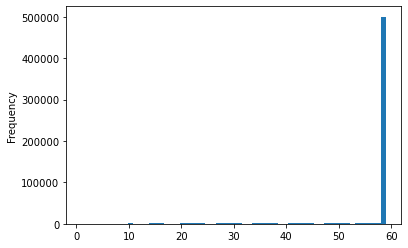

In [13]:
df_train_on_test['count'].plot.hist(bins=59)

In [8]:
df_train_on_test.describe(include='all').transpose()

/opt/conda/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/opt/conda/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
item_domain_id,551470,8243,MLB-SUPPLEMENTS,12032,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_id,551472,NaN,NaN,NaN,NaT,NaT,259013,149412,0,129796,259092,388294,517895
item_title,551472,407133,Case Acrigel iPhone Galaxy Huawei Xiaomi Moto ...,164,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
site_id,551472,3,MLB,281298,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,22859,13443,MLB6125887,28,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_family_id,66451,25983,MLB12287867,183,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,551472,NaN,NaN,NaN,NaT,NaT,56.7289,8.64205,1,59,59,59,59
date_first,551472,59,2021-02-01 00:00:00,500404,2021-02-01,2021-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_last,551472,1,2021-03-31 00:00:00,551472,2021-03-31,2021-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_diff,551472,NaN,NaN,NaN,NaT,NaT,55.7289,8.64205,0,58,58,58,58


In [9]:
df_train_on_test['count'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

59    90.74%
56     0.35%
58     0.31%
57     0.29%
49     0.27%
55     0.27%
27     0.26%
50     0.25%
36     0.25%
35     0.24%
43     0.24%
48     0.24%
52     0.23%
51     0.23%
42     0.22%
37     0.22%
28     0.22%
29     0.22%
38     0.21%
44      0.2%
30      0.2%
34      0.2%
41     0.19%
31     0.19%
45     0.19%
21     0.18%
22     0.18%
24     0.17%
23     0.16%
14     0.15%
20     0.15%
10     0.15%
54     0.15%
16     0.14%
15     0.14%
9      0.13%
17     0.13%
8      0.12%
13     0.12%
6      0.11%
7      0.11%
47     0.11%
2       0.1%
1       0.1%
3       0.1%
53     0.09%
33     0.09%
40     0.08%
26     0.08%
19     0.07%
32     0.07%
39     0.06%
25     0.06%
12     0.06%
46     0.06%
18     0.05%
5      0.04%
11     0.04%
4      0.03%
Name: count, dtype: object

In [12]:
bad_df = df_train_v1.index.isin(df_test['sku'])
df_train_not_on_test = df_train_v1.loc[~bad_df]

In [14]:
len(df_train_not_on_test)/len(df_train_v1)

0.16559441744487954

In [16]:
df_train_not_on_test.describe(include='all').transpose()

/opt/conda/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/opt/conda/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
item_domain_id,109443,5837,MLB-SUPPLEMENTS,1606,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_id,109444,NaN,NaN,NaN,NaT,NaT,259791,149611,1,130212,259818,389503,517866
item_title,109444,89624,Capa Capinha Com Logo iPhone 5 6 7 8 Plus X Xr...,82,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
site_id,109444,3,MLB,55036,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,6809,4979,MLM15283838,18,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_family_id,16733,9479,MLB12287867,79,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,109444,NaN,NaN,NaN,NaT,NaT,58.2568,4.17247,3,59,59,59,59
date_first,109444,56,2021-02-01 00:00:00,103826,2021-02-01,2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_last,109444,1,2021-03-31 00:00:00,109444,2021-03-31,2021-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_diff,109444,NaN,NaN,NaN,NaT,NaT,57.2568,4.17247,2,58,58,58,58


In [15]:
df_train_not_on_test['count'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

59    94.87%
56     0.47%
58      0.4%
57     0.28%
48     0.27%
55     0.25%
50     0.22%
51     0.22%
52     0.22%
49     0.22%
42     0.17%
41     0.14%
45     0.14%
44     0.14%
43     0.14%
54     0.13%
38     0.12%
31     0.12%
36     0.12%
34     0.11%
37     0.11%
30      0.1%
35      0.1%
29     0.09%
53     0.07%
24     0.07%
28     0.07%
47     0.06%
27     0.05%
21     0.04%
20     0.04%
40     0.04%
39     0.04%
23     0.04%
22     0.04%
33     0.03%
32     0.03%
46     0.03%
17     0.02%
19     0.02%
15     0.02%
13     0.02%
26     0.02%
16     0.02%
25     0.02%
10     0.01%
14     0.01%
8      0.01%
9      0.01%
7      0.01%
12     0.01%
18      0.0%
6       0.0%
3       0.0%
11      0.0%
5       0.0%
Name: count, dtype: object

In [68]:
describ_test = df_train_on_test.describe(include='all')
describ_train_only = df_train_not_on_test.describe(include='all')

/opt/conda/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/opt/conda/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/opt/conda/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric

In [69]:
describ_test.columns = describ_test.columns + '_TEST'
describ_train_only.columns = describ_train_only.columns + '_TRAIN'

In [70]:
pd.set_option('display.max_rows', 150)
column_order = []
for i, j in zip(describ_test.columns, describ_train_only.columns):
    column_order.append(i)
    column_order.append(j)
describ_test.transpose().append(describ_train_only.transpose()).loc[column_order]

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
item_domain_id_TEST,551470,8243,MLB-SUPPLEMENTS,12032,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_domain_id_TRAIN,109443,5837,MLB-SUPPLEMENTS,1606,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_id_TEST,551472,NaN,NaN,NaN,NaT,NaT,259013,149412,0,129796,259092,388294,517895
item_id_TRAIN,109444,NaN,NaN,NaN,NaT,NaT,259791,149611,1,130212,259818,389503,517866
item_title_TEST,551472,407133,Case Acrigel iPhone Galaxy Huawei Xiaomi Moto ...,164,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_title_TRAIN,109444,89624,Capa Capinha Com Logo iPhone 5 6 7 8 Plus X Xr...,82,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
site_id_TEST,551472,3,MLB,281298,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
site_id_TRAIN,109444,3,MLB,55036,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id_TEST,22859,13443,MLB6125887,28,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id_TRAIN,6809,4979,MLM15283838,18,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 300)
describ_train_only.compare(describ_test).transpose()

count  unique  \
item_domain_id                 self   109443    5837   
                               other  551470    8243   
item_id                        self   109444     NaN   
                               other  551472     NaN   
item_title                     self   109444   89624   
                               other  551472  407133   
site_id                        self   109444     NaN   
                               other  551472     NaN   
product_id                     self     6809    4979   
                               other   22859   13443   
product_family_id              self    16733    9479   
                               other   66451   25983   
count                          self   109444     NaN   
                               other  551472     NaN   
date_first                     self   109444      56   
                               other  551472      59   
date_last                      self   109444     NaN   
                               other  551472     NaN   
date_diff                      self   109444     NaN   
                               other  551472     NaN   
sold_quantity_first            self   109444     NaN   
                               other  551472     NaN   
sold_quantity_last             self   109444     NaN   
                               other  551472     NaN   
sold_quantity_sum              self   109444     NaN   
                               other  551472     NaN   
sold_quantity_mean             self   109444     NaN   
                               other  551472     NaN   
sold_quantity_std              self   109444     NaN   
                               other  550920     NaN   
sold_quantity_min              self   109444     NaN   
                               other  551472     NaN   
sold_quantity_max              self   109444     NaN   
                               other  551472     NaN   
sold_quantity_mode             self   109444     NaN   
                               other  551472     NaN   
sold_quantity_mode_tx          self   109444     NaN   
                               other  551472     NaN   
current_price_first            self   109444     NaN   
                               other  551472     NaN   
current_price_last             self   109444     NaN   
                               other  551472     NaN   
current_price_sum              self   109444     NaN   
                               other  551472     NaN   
current_price_mean             self   109444     NaN   
                               other  551472     NaN   
current_price_std              self   109444     NaN   
                               other  550920     NaN   
current_price_min              self   109444     NaN   
                               other  551472     NaN   
current_price_max              self   109444     NaN   
                               other  551472     NaN   
current_price_mode             self   109444     NaN   
                               other  551472     NaN   
current_price_mode_tx          self   109444     NaN   
                               other  551472     NaN   
minutes_active_first           self   109444     NaN   
                               other  551472     NaN   
minutes_active_last            self   109444     NaN   
                               other  551472     NaN   
minutes_active_sum             self   109444     NaN   
                               other  551472     NaN   
minutes_active_mean            self   109444     NaN   
                               other  551472     NaN   
minutes_active_std             self   109444     NaN   
                               other  550920     NaN   
minutes_active_min             self   109444     NaN   
                               other  551472     NaN   
minutes_active_max             self   109444     NaN   
                               other  551472     NaN   
minutes_active_mode            self   109444     NaN   
       